In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image,display
%matplotlib inline
import missingno
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import numpy as np

In [ ]:
train=pd.read_csv('train_tit.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test=pd.read_csv('test_tit.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_dict=pd.DataFrame(train.dtypes,columns=['Data types'])
train_dict['null']=train.isnull().sum()
train_dict['unique vals']=train.nunique()
train_dict['count']=train.count()
train_dict

,Data types,null,unique vals,count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [ ]:
train.drop(['PassengerId','Cabin','Name'],1,inplace=True)

In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

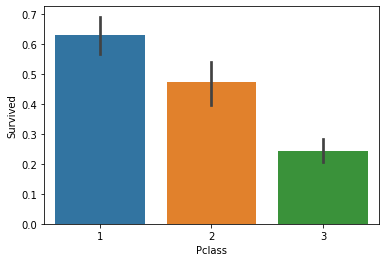

In [ ]:
pclass_graph=sns.barplot(x='Pclass',y='Survived',data=train)

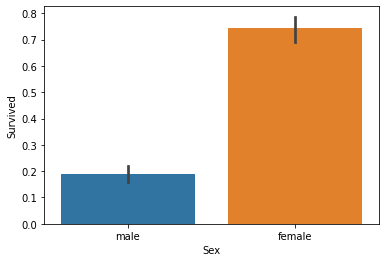

In [ ]:
sex_graph=sns.barplot(x='Sex',y='Survived',data=train)

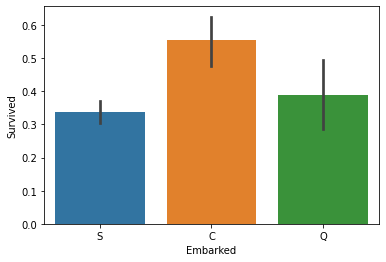

In [ ]:
embarked_graph=sns.barplot(x='Embarked',y='Survived',data=train)

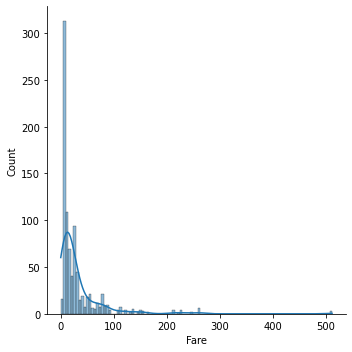

In [ ]:
sns.displot(train['Fare'].dropna(),kde=True)

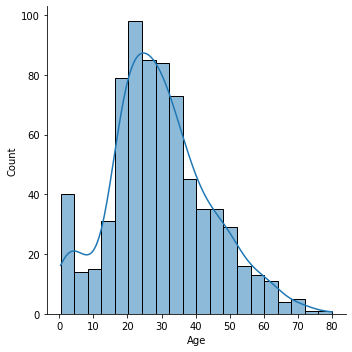

In [ ]:
sns.displot(train['Age'].dropna(),kde=True)

In [ ]:
corr_mtx=train.corr()
corr_mtx['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [ ]:
corr_mtx['Fare'].sort_values(ascending=False)

Fare        1.000000
Survived    0.257307
Parch       0.216225
SibSp       0.159651
Age         0.096067
Pclass     -0.549500
Name: Fare, dtype: float64

In [ ]:
df=train[['Age','Survived']]
df['Age_grp']=0
df=df.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.loc[df["Age"] <= 10 , "Age_group"] = 10
df.loc[(df["Age"] > 10) & (df["Age"] <= 20), "Age_group"] = 20
df.loc[(df["Age"] > 20) & (df["Age"] <= 30), "Age_group"] = 30
df.loc[(df["Age"] > 30) & (df["Age"] <= 40), "Age_group"] = 40
df.loc[(df["Age"] > 40) & (df["Age"] <= 50), "Age_group"] = 50
df.loc[(df["Age"] > 50) & (df["Age"] <= 60), "Age_group"] = 60
df.loc[(df["Age"] > 60) & (df["Age"] <= 70), "Age_group"] = 70
df.loc[(df["Age"] > 70), "Age_group"] = 80

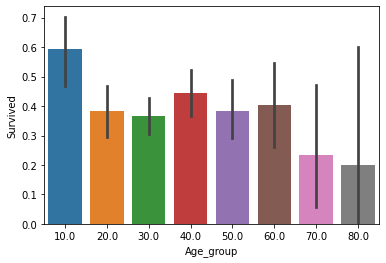

In [ ]:
sns.barplot(x = "Age_group", y = "Survived", data = df)

In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
#data pre processing
train_dict

,Data types,null,unique vals,count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


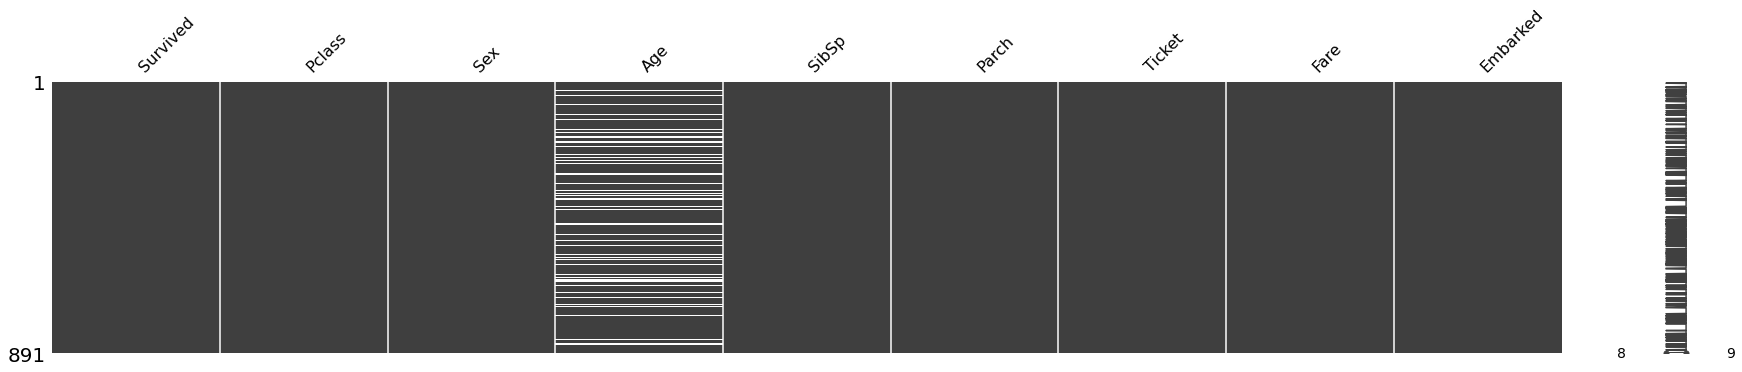

In [ ]:
missingno.matrix(train,figsize=(30,5))


In [ ]:
(train['Fare']==0).sum()

15

In [ ]:
train.Fare=train.Fare.replace(0,np.NAN)

In [ ]:
train[train['Fare'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,0,3,male,36.0,0,0,LINE,NaN,S
263,0,1,male,40.0,0,0,112059,NaN,S
271,1,3,male,25.0,0,0,LINE,NaN,S
277,0,2,male,NaN,0,0,239853,NaN,S
302,0,3,male,19.0,0,0,LINE,NaN,S
413,0,2,male,NaN,0,0,239853,NaN,S
466,0,2,male,NaN,0,0,239853,NaN,S
481,0,2,male,NaN,0,0,239854,NaN,S
597,0,3,male,49.0,0,0,LINE,NaN,S
633,0,1,male,NaN,0,0,112052,NaN,S


In [ ]:
train['Fare'].fillna(train['Fare'].mean(),inplace=True)


In [ ]:
corr_mtx['Age'].sort_values(ascending=False)


Age         1.000000
Fare        0.096067
Survived   -0.077221
Parch      -0.189119
SibSp      -0.308247
Pclass     -0.369226
Name: Age, dtype: float64

In [ ]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
train.dropna(axis=0,inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [ ]:
train= pd.get_dummies(train,columns=["Embarked","Sex"],drop_first=True)

In [ ]:
train.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Sex_male
65,1,3,29.699118,1,1,2661,15.2458,0,0,1
72,0,2,21.000000,0,0,S.O.C. 14879,73.5000,0,1,1
819,0,3,10.000000,3,2,347088,27.9000,0,1,1
653,1,3,29.699118,0,0,330919,7.8292,1,0,0
654,0,3,18.000000,0,0,365226,6.7500,1,0,0
299,1,1,50.000000,0,1,PC 17558,247.5208,0,0,0
469,1,3,0.750000,2,1,2666,19.2583,0,0,0
349,0,3,42.000000,0,0,315088,8.6625,0,1,1
221,0,2,27.000000,0,0,220367,13.0000,0,1,1
742,1,1,21.000000,2,2,PC 17608,262.3750,0,0,0


In [ ]:
train.drop('Ticket',1,inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


DOING THE SAME WITH TEST SET

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test.drop(['Ticket','PassengerId','Cabin','Name'],1,inplace=True)


In [ ]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [ ]:
test.shape

(418, 7)

In [ ]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [ ]:
test.dropna(axis=0,inplace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [ ]:
test = pd.get_dummies(test,columns=["Embarked","Sex"],drop_first=True)

In [ ]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,34.5,0,0,7.8292,1,0,1
1,3,47.0,1,0,7.0000,0,1,0
2,2,62.0,0,0,9.6875,1,0,1
3,3,27.0,0,0,8.6625,0,1,1
4,3,22.0,1,1,12.2875,0,1,0


In [ ]:
X=train.drop('Survived',1)

In [ ]:
y=train.Survived

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
get_score(LogisticRegression(),X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.797752808988764

In [ ]:
get_score(SVC(),X_train, X_test, y_train, y_test)

0.6704119850187266

In [ ]:
get_score( RandomForestClassifier(n_estimators =150),X_train, X_test, y_train, y_test)

0.7902621722846442

In [ ]:
get_score(KNeighborsClassifier(n_neighbors=6),X_train, X_test, y_train, y_test)

0.700374531835206

choosing Random forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 150) 
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.7865168539325843

In [ ]:
submission=pd.read_csv('gender.csv')

In [ ]:
y_pred = rf.predict(test)

In [ ]:
Accuracy = np.mean(submission["Survived"] == y_pred)
Accuracy

0.84688995215311

NEURAL NETWORK

In [ ]:
Xtrain=np.array(X_train)
Xtest=np.array(X_test)
ytrain=np.array(y_train)
ytest=np.array(y_test)

In [ ]:
Xtrain.shape

(622, 8)

In [ ]:
ytrain.shape

(622,)

In [ ]:
Xtrain[0].shape

(8,)

In [ ]:
model=keras.Sequential([keras.layers.Dense(100,input_shape=(8,),activation='sigmoid'),
                        keras.layers.Dense(50,activation='sigmoid'),
                        keras.layers.Dense(25,activation='sigmoid'),
                        keras.layers.Dense(10,activation='sigmoid'),
                        keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(Xtrain,ytrain,epochs=200)

Epoch 1/200
20/20 [==============================] - 1s 2ms/step - loss: 0.6712 - accuracy: 0.6141
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.6158
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6158
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6158
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6254
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6817
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.6881
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.6897
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.6865
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.6929
Epoch 11/

In [ ]:
model.evaluate(Xtest,ytest) 

9/9 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7678


[0.49050161242485046, 0.7677902579307556]